n = 1.5241032512688113 ± 0.024430047609383


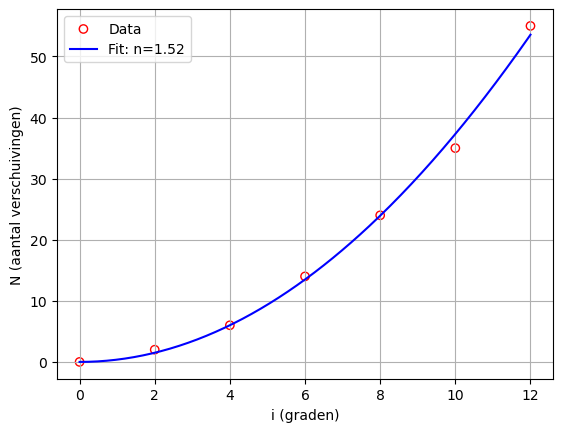

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_model(i, n):
    lam = 532e-9   # golflengte (m)
    d   = 1e-3     # dikte (m)
    return (2 * d / lam) * (n - np.sqrt(n**2 - np.sin(i)**2))

i_deg  = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad  = np.deg2rad(i_deg)
N_data = np.array([0, 2, 6, 14, 24, 35, 55]) # testwaardes

p0 = [1.5]

popt, pcov = curve_fit(N_model, i_rad, N_data, p0=p0)
perr = np.sqrt(np.diag(pcov))

print("n =", popt[0], "±", perr[0])

i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.scatter(i_deg, N_data, facecolors='none', edgecolors='r', label="Data")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', label=f"Fit: n={popt[0]:.2f}")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()


Bronnen afleiding 
https://vlab.amrita.edu/index.php?brch=189&cnt=1&sim=1519&sub=1

https://lo-amrt.vlabs.ac.in/exp/michelsons-interferometer-refractive/theory.html

n = 1.500 ± inf


C:\Users\helen\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
C:\Users\helen\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:542: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)
C:\Users\helen\AppData\Local\Temp\ipykernel_23736\4106831681.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(N_model, i_rad, means, p0=[1.5], sigma=errors, absolute_sigma=True)


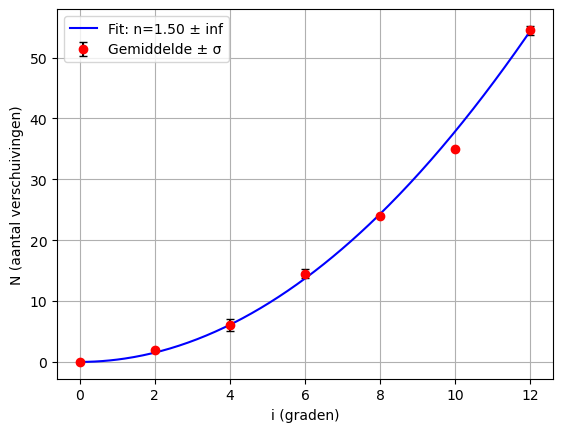

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_model(i, n):
    lam = 532e-9   # golflengte (m)
    d   = 1e-3     # dikte (m)
    return (2 * d / lam) * (n - np.sqrt(n**2 - np.sin(i)**2))

# Data per hoek (meerdere metingen in een lijst)
data = {
    0:  [0],
    2:  [2],
    4:  [6, 7, 5],
    6:  [14, 15],
    8:  [24],
    10: [35],
    12: [55, 54]
}

# Bereken gemiddelden en fouten (σ)
angles = np.array(list(data.keys()))
means  = np.array([np.mean(v) for v in data.values()])
errors = np.array([np.std(v, ddof=1) if len(v) > 1 else 0 for v in data.values()])
i_rad  = np.deg2rad(angles)

# Fit (errors meegeven als weging)
popt, pcov = curve_fit(N_model, i_rad, means, p0=[1.5], sigma=errors, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print(f"n = {popt[0]:.3f} ± {perr[0]:.3f}")

# Plot
i_fit = np.linspace(0, np.deg2rad(max(angles)), 300)
plt.errorbar(angles, means, yerr=errors, fmt='o', color='r', ecolor='black', capsize=3, label="Gemiddelde ± σ")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', label=f"Fit: n={popt[0]:.2f} ± {perr[0]:.2f}")
plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid(True)
plt.show()
